In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Importing the dataset
dataset = pd.read_csv('D:\\jupyterlab\\lab3\\pica2015.csv')
data = dataset[['ST001D01T','ST127Q01TA','ST127Q02TA','REPEAT']]
data.head(10)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,244) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ST001D01T,ST127Q01TA,ST127Q02TA,REPEAT
0,8,2,2,1
1,8,1,3,1
2,8,2,2,1
3,9,1,2,1
4,9,1,2,1
5,9,1,2,1
6,9,9,2,1
7,9,9,2,1
8,9,9,2,1
9,9,1,2,1


In [4]:
pd.get_option("max_info_columns")
pd.options.display.max_info_columns = 430
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32130 entries, 0 to 32129
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ST001D01T   32130 non-null  int64
 1   ST127Q01TA  32130 non-null  int64
 2   ST127Q02TA  32130 non-null  int64
 3   REPEAT      32130 non-null  int64
dtypes: int64(4)
memory usage: 1004.2 KB


<AxesSubplot:>

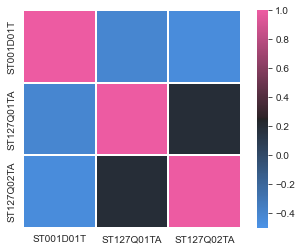

In [4]:
# heatmap
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,345,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

<AxesSubplot:xlabel='ST127Q02TA', ylabel='Count'>

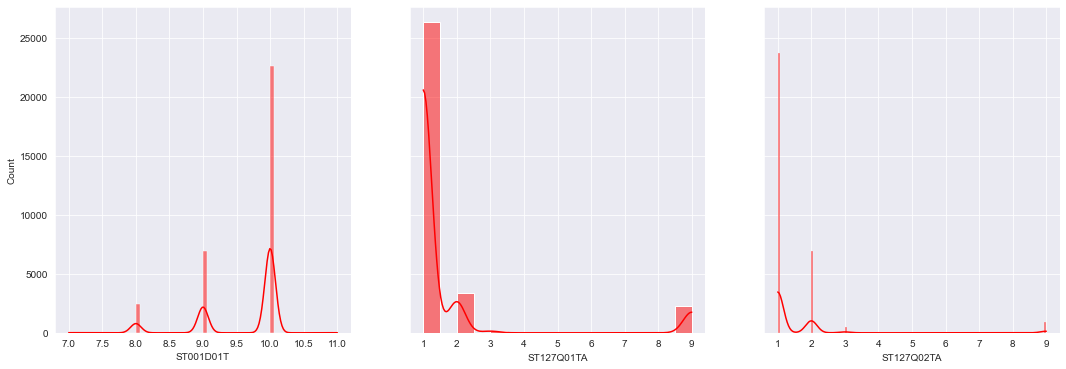

In [5]:
fig,axes = plt.subplots(1,3,figsize=(18,6),sharey=True)
sns.histplot(data,ax=axes[0],x='ST001D01T',kde=True,color='r')
sns.histplot(data,ax=axes[1],x='ST127Q01TA',kde=True,color='r')
sns.histplot(data,ax=axes[2],x='ST127Q02TA',kde=True,color='r')

In [5]:
# Calculate P(Y=y) for all possible y
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [6]:
# Calculate P(X=x|Y=y) categorically
def calculate_likelihood_categoorical(df,feat_name,feat_val,Y,label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val])/len(df)
    return p_x_given_y

In [7]:
# Calculate P(X=x1|Y=y)P(X=x2|Y=y)……P(X=xn|Y=y)P(Y=y) for all y and find the maximum
def naive_bayes_categorical(df,X,Y):
    # get featyre names
    features= list(df.columns)[:-1]
    # calculate prior(df,Y)
    prior = calculate_prior(df,Y)
    Y_pred=[]
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels=sorted(list(df[Y].unique()))
        likelihood=[1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]*=calculate_likelihood_categoorical(df,features[i],x[i],Y,labels[j])
        # calculate posterior probability(numerator only)
        post_prob=[1]*len(labels)
        for j in range(len(labels)):
            post_prob[j]=likelihood[j]*prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [32]:
# cross validate
group=int(len(data)/5)
train=data[:-1*group]
test=data[-1*group:]

X_test=test.iloc[:,:-1].values
Y_test=test.iloc[:,-1].values
# print(X_test)
# print(Y_test)
Y_pred=naive_bayes_categorical(train,X=X_test,Y="REPEAT")
accurate=0
acc=0
for i in range(len(Y_test)):
    if Y_pred[i]==Y_test[i]:
        accurate+=1
acc=accurate/len(Y_test)
print(acc)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(Y_test, Y_pred))
# from sklearn.metrics import confusion_matrix,f1_score
# print(confusion_matrix(Y_test,Y_pred))
# print(f1_score(Y_test,Y_pred))
# print((Y_test[1]))
# print((Y_pred)[1])

0.9954870837223778
0.9954870837223778


In [33]:
train2= pd.concat([data[:-2*group],data[-1*group:]], axis=0, ignore_index=False)
test2=data[-2*group:-1*group]

X_test2=test2.iloc[:,:-1].values
Y_test2=test2.iloc[:,-1].values
# print(X_test)
# print(Y_test)
Y_pred2=naive_bayes_categorical(train2,X=X_test2,Y="REPEAT")
accurate2=0
acc2=0
for i in range(len(Y_test2)):
    if Y_pred2[i]==Y_test2[i]:
        accurate2+=1
acc2=accurate2/len(Y_test2)
print(acc2)

0.9967320261437909


In [34]:
train3= pd.concat([data[:-3*group],data[-2*group:]], axis=0, ignore_index=False)
test3=data[-3*group:-2*group]

X_test3=test3.iloc[:,:-1].values
Y_test3=test3.iloc[:,-1].values
# print(X_test)
# print(Y_test)
Y_pred3=naive_bayes_categorical(train3,X=X_test3,Y="REPEAT")
accurate3=0
acc3=0
for i in range(len(Y_test3)):
    if Y_pred3[i]==Y_test3[i]:
        accurate3+=1
acc3=accurate3/len(Y_test3)
print(acc3)

0.9979769685652039


In [35]:
train4= pd.concat([data[:group],data[2*group:]], axis=0, ignore_index=False)
test4=data[group:2*group]

X_test4=test4.iloc[:,:-1].values
Y_test4=test4.iloc[:,-1].values
# print(X_test)
# print(Y_test)
Y_pred4=naive_bayes_categorical(train4,X=X_test4,Y="REPEAT")
accurate4=0
acc4=0
for i in range(len(Y_test4)):
    if Y_pred4[i]==Y_test4[i]:
        accurate4+=1
acc4=accurate4/len(Y_test4)
print(acc4)

0.9982882041705571


In [36]:
train5=data[group:]
test5=data[:group]

X_test5=test5.iloc[:,:-1].values
Y_test5=test5.iloc[:,-1].values
# print(X_test)
# print(Y_test)
Y_pred5=naive_bayes_categorical(train5,X=X_test5,Y="REPEAT")
accurate5=0
acc5=0
for i in range(len(Y_test5)):
    if Y_pred5[i]==Y_test5[i]:
        accurate5+=1
acc5=accurate5/len(Y_test5)
print(acc5)

0.9982882041705571


In [28]:
aver=(acc+acc2+acc3+acc4+acc5)/5.0
print(aver)

0.9973544973544973
